In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carrega os dados do arquivo Excel
dataset = pd.read_excel('Input_Total.xlsx')
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]
dataset = dataset.filter(regex=r'^(?!.*Keq)')

#Perason comeca aqui - Correlacao de 0.6
dataset = dataset.drop('Classe', axis=1)
dataset = dataset.drop('Composto', axis=1)
dataset = dataset.drop('Átomos', axis=1)


dataframe_pandas_features= dataset

print(dataset.columns)
corr_matrix = dataset.corr(method ='pearson', numeric_only=True).abs()

# Selecionar o triângulo superior da matriz de correlação
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar os índices das colunas com correlação maior que 0.6
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]

# Remover apenas a primeira coluna de cada par altamente correlacionado
dataset = dataset.drop(to_drop, axis=1)



print(len(dataset.columns))
print(dataset.columns)
#sns.heatmap(correlation,cbar = True,linewidths= 0.5)
#plt.savefig('heatmap.png', dpi=1200, bbox_inches='tight')

Index(['atomic_ea_minimo', 'atomic_ea_maximo', 'atomic_ea_soma',
       'atomic_ea_media', 'atomic_ea_desvio', 'atomic_en_allen _soma',
       'atomic_en_allen _media', 'atomic_en_allen _desvio',
       'atomic_en_allredroch_minimo', 'atomic_en_allredroch_soma',
       ...
       'entropia-oxidos_minimo', 'entropia-oxidos_maximo',
       'entropia-oxidos_soma', 'entropia-oxidos_media',
       'entropia-oxidos_desvio', 'deltaCp-oxidos_minimo',
       'deltaCp-oxidos_maximo', 'deltaCp-oxidos_soma', 'deltaCp-oxidos_media',
       'deltaCp-oxidos_desvio'],
      dtype='object', length=204)
12
Index(['atomic_ea_minimo', 'atomic_ea_maximo', 'atomic_ea_soma',
       'atomic_en_allen _soma', 'atomic_en_allen _desvio',
       'atomic_en_allredroch_minimo', 'atomic_hatm_minimo',
       'atomic_spacegroupnum_maximo', 'atomic_spacegroupnum_desvio',
       'mineral_hardness_maximo', 'van_der_waals_rad_minimo',
       'vel_of_sound_minimo'],
      dtype='object')


In [1]:
pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 30.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.2 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [3]:
#Pearson
import pickle

with open('X_trainGB.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open('X_testGB.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('y_trainGB.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('y_testGB.pickle', 'rb') as f:
    y_test = pickle.load(f)

with open('modelGB.pkl', 'rb') as f:
    model = pickle.load(f)


with open('scalerGB.pickle', 'rb') as f:
    scaler = pickle.load(f)


colunas_para_manter = ['atomic_ea_minimo', 'atomic_ea_maximo', 'atomic_ea_soma',
       'atomic_en_allen _soma', 'atomic_en_allen _desvio',
       'atomic_en_allredroch_minimo', 'atomic_hatm_minimo',
       'atomic_spacegroupnum_maximo', 'atomic_spacegroupnum_desvio',
        'van_der_waals_rad_minimo']

#vel_of_sound_minimo
#mineral_hardness_maximo



In [4]:
import numpy as np
import pandas as pd



def reduzir_dimensao (reduzendo, todas_as_features, colunas_para_manter) :

  arr = reduzendo

  # obter todos os rótulos das colunas do dataframe
  rotulos_das_colunas = todas_as_features.columns.tolist()

  # criar uma lista com as posições das colunas a serem deletadas
  colunas_para_deletar = [i for i in range(len(rotulos_das_colunas)) if rotulos_das_colunas[i] not in colunas_para_manter]

  # deletar as colunas do array numpy
  arr = np.delete(arr, colunas_para_deletar, axis=1)

  return arr

#reduzir features conjunto X

X_train = reduzir_dimensao(X_train,dataframe_pandas_features,colunas_para_manter).copy()
X_test = reduzir_dimensao(X_test,dataframe_pandas_features,colunas_para_manter).copy()


In [5]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

0.8275862068965517
              precision    recall  f1-score   support

    Fluorita       1.00      1.00      1.00         6
       Mixed       0.00      0.00      0.00         0
 Monoclinica       1.00      0.50      0.67         2
  Perovskita       1.00      0.50      0.67         2
   Pirocloro       0.75      0.60      0.67         5
    RockSalt       1.00      0.89      0.94         9
      Spinel       1.00      1.00      1.00         5

    accuracy                           0.83        29
   macro avg       0.82      0.64      0.71        29
weighted avg       0.96      0.83      0.88        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


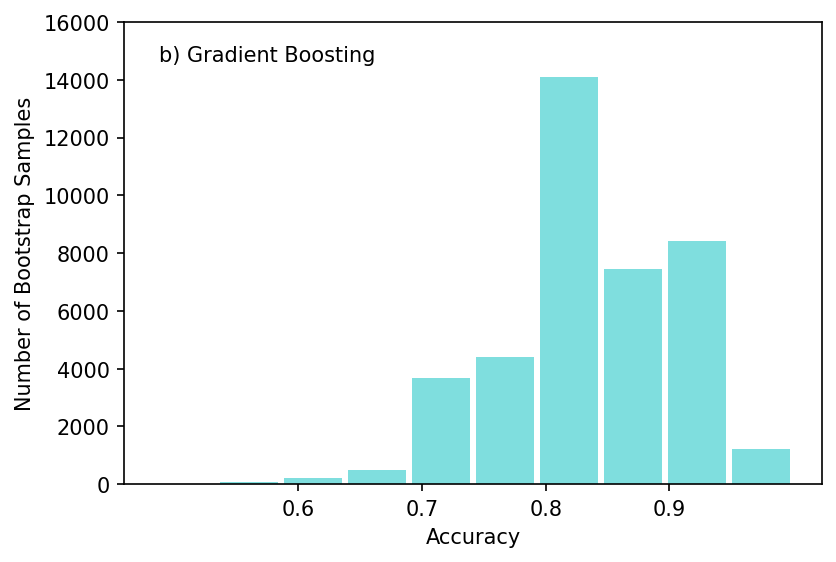

Intervalo de confiança : [0.6896551724137931,0.9655172413793104]
Acurácia 'real' do modelo performada no teste : 0.8275862068965517


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Intervalo de confiança da acurácia

def new_boot(X_test, y_test):
    novo_X = X_test.copy()
    novo_Y = y_test.copy()
    c = 0
    while c < len(X_test):
        rand = random.randint(0, len(X_test) - 1)
        novo_X[c] = X_test[rand].copy()
        novo_Y[c] = y_test[rand]
        c += 1
    return novo_X, novo_Y

# Pega a acurácia de um boot
def pegar_acuracia_do_relatorio(novo_X, novo_Y):
    return accuracy_score(novo_Y, model.predict(novo_X), sample_weight=None)

# Calcula a distribuição dos boots
numero_boots = 40001
lista_boots = []
contador = 0

while contador < numero_boots:
    x, y = new_boot(X_test, y_test)
    lista_boots.append(pegar_acuracia_do_relatorio(x, y))
    contador += 1


plt.figure(figsize=(6, 4),dpi=150)
plt.hist(lista_boots, rwidth=0.9, color='c', alpha=0.5)
plt.xlabel('Accuracy',fontsize=10)
plt.ylabel('Number of Bootstrap Samples',fontsize=10)

# Define a escala do eixo y
y_start = 0  # Valor inicial
y_end = 16000  # Valor final
y_step = 2000  # Incremento
plt.yticks(np.arange(y_start, y_end + y_step , y_step))

# Define a escala do eixo x
x_start = 0.6  # Valor inicial do eixo x
x_end = 1   # Valor final do eixo x
x_step = 0.1  # Incremento do eixo x
plt.xticks(np.arange(x_start, x_end , x_step))

#text = "b) Gradient Boosting"
text = "b) Gradient Boosting"
plt.text(
    x=0.050, y=0.95, s=text, ha='left', va='top',
    transform=plt.gca().transAxes,
    fontsize=10,  # Mesmo tamanho de fonte
    fontfamily='DejaVu Sans'  # Mesma fonte

)



plt.show()



# Converte a lista em float explicitamente para a função percentile ser aplicada
array = [float(elemento) for elemento in lista_boots]

# Calcula os limites da integral da gaussiana que correspondem à área desejada
alpha = 0.95
p = ((1.0 - alpha) / 2.0) * 100
lower = np.percentile(array, p)
p = (alpha + ((1.0 - alpha) / 2.0)) * 100
upper = np.percentile(array, p)

print("Intervalo de confiança : [" + str(lower) + "," + str(upper) + "]")
print("Acurácia 'real' do modelo performada no teste : " + str(accuracy_score(y_test, model.predict(X_test), sample_weight=None)))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


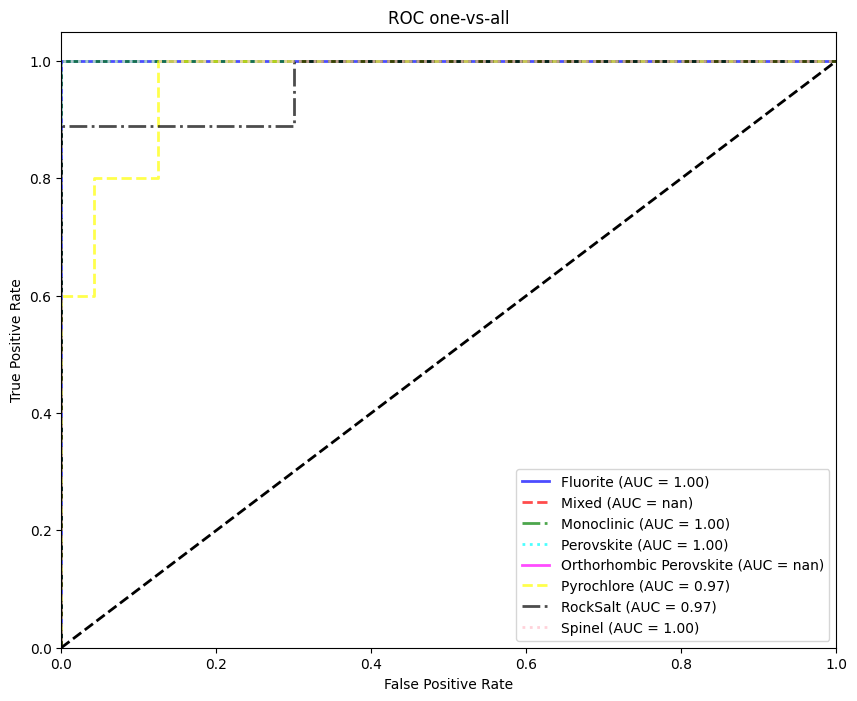

In [6]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Supondo que y_test já esteja disponível e não seja binário
# Se y_test já for binário (em formato one-hot), você pode pular esta etapa
# Binarizar os rótulos em uma configuração um contra todos
classes = model.classes_
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Prever probabilidades. Certifique-se de que seu modelo tem um método `predict_proba`
y_score = model.predict_proba(X_test)

# Computar ROC curve e ROC area para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Associar os nomes das classes binarizadas
class_labels = model.classes_

# Garantir que class_labels corresponde às classes
assert len(class_labels) == len(classes), "O número de class_labels deve corresponder ao número de classes."


class_labels_ing = [
    "Fluorite",
    "Mixed",
    "Monoclinic",
    "Perovskite",
    "Orthorhombic Perovskite",
    "Pyrochlore",
    "RockSalt",
    "Spinel"
]  # Lista para armazenar as classes em inglês

# Plot da curva ROC para cada classe
colors = cycle(['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightblue', 'gray', 'orange', 'purple'])
linestyles = cycle(['-', '--', '-.', ':'])
plt.figure(figsize=(10, 8))
for i, (color, linestyle) in zip(range(n_classes), zip(colors, linestyles)):
    plt.plot(fpr[i], tpr[i], color=color, linestyle=linestyle, lw=2, alpha=0.7,
             label='{0} (AUC = {1:0.2f})'.format(class_labels_ing[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC one-vs-all')
plt.legend(loc="lower right")
plt.show()


In [7]:
import pickle

# Salvando as variáveis em um arquivo pickle
with open('fpr_tpr_rocauc_GB.pkl', 'wb') as file:
    pickle.dump({'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}, file)